Data 
  
    - Collected from weight.csv file and applied two columns( weighted_value, IsHS) only. 
    - Performed data preprocessing step. 
    - Manipulated four models(Random-Forest, LogisticRegression,AdaBoostClassifier and KNeighborsClassifier)
    - Selected the best model to predict a label value whether a HS Comment or No HS Comment.
    - Calculated a confusion matrix (Accuracy, Precision,Recall, F1-Score). 


In [1]:
import pandas as pd
import numpy as np
from glob import glob 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import math 
import gspread 
import os 
from oauth2client.service_account import ServiceAccountCredentials
import pickle
import joblib

In [2]:
scope = ["https://spreadsheets.google.com/feeds", 'https://www.googleapis.com/auth/drive']

creds= ServiceAccountCredentials.from_json_keyfile_name('hs_data_sheet.json',scope)
client = gspread.authorize(creds)
HS_Accuracy =client.open('HS_Accuracy')

weighted_value_by_sentence = HS_Accuracy.get_worksheet(4)   #annotate_here

weighted_value_by_sentence_val=weighted_value_by_sentence.get_all_records()
weighted_value_by_sentence_list=[]
for index in range(len(weighted_value_by_sentence_val)):
    for key in weighted_value_by_sentence_val[index]:
        if key=='MsgUniSeg':
            MsgUniSeg_key=weighted_value_by_sentence_val[index][key]
        elif key=='Weighted_Value':
            Weighted_Value_key =weighted_value_by_sentence_val[index][key]
        elif key=='IsHS':
            IsHS=weighted_value_by_sentence_val[index][key]
        else:pass
    weighted_value_by_sentence_list.append([MsgUniSeg_key,Weighted_Value_key,IsHS])

#Create annotate_here dataframe 
weighted_val_new = pd.DataFrame(weighted_value_by_sentence_list, columns=['MsgUniSeg','Weighted_Value','IsHS'])


# Preprocessing Step

In [3]:
print(weighted_val_new.dtypes)

MsgUniSeg          object
Weighted_Value    float64
IsHS                int64
dtype: object


In [4]:
# Check missing values in a given dataset
weighted_val_new.isna().sum()

MsgUniSeg         130
Weighted_Value      0
IsHS                0
dtype: int64

In [5]:
weighted_val_new.shape

(15478, 3)

In [6]:
weighted_val_updated =weighted_val_new.dropna()

In [7]:
weighted_val_updated.isna().sum()

MsgUniSeg         0
Weighted_Value    0
IsHS              0
dtype: int64

In [8]:
weighted_val_updated.shape

(15348, 3)

In [9]:
# Statistical summary of all attributes

statistical_summary = weighted_val_updated.describe()
statistical_summary

,Weighted_Value,IsHS
count,15348.000000,15348.000000
mean,0.415451,0.198918
std,0.490783,0.399200
min,0.000000,0.000000
25%,0.119239,0.000000
50%,0.261803,0.000000
75%,0.572491,0.000000
max,9.228528,1.000000


#### Here, maximum number of weighted_value is 3.642369 and minimum number of weighted_value is 0.0. 

In [10]:
weighted_val_updated.isna().sum()

MsgUniSeg         0
Weighted_Value    0
IsHS              0
dtype: int64

In [11]:
weighted_val_updated['IsHS'].value_counts()

0    12295
1     3053
Name: IsHS, dtype: int64

In [12]:
weighted_val_updated.columns

Index(['MsgUniSeg', 'Weighted_Value', 'IsHS'], dtype='object')

In [13]:
X=weighted_val_updated[['Weighted_Value']]

In [14]:
 weighted_val_updated['IsHS'].unique()

array([1, 0])

In [15]:
# y is a vector, hence we use dot to access 'label'
y = weighted_val_updated[['IsHS']]

In [16]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=1,shuffle=True,stratify=y)

In [17]:
## Apply RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = (rf_model.predict_proba(X_test))
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.8447009361415586
RF test roc-auc: 0.7300045810689397


In [18]:
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.7500861017946692
Logistic test roc-auc: 0.7490268187849869


In [19]:
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.7636533195381965
Adaboost test roc-auc: 0.7575802190153424


In [20]:
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.7642787062078442
Adaboost test roc-auc: 0.7024736292601277


In [21]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print(' test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

 test roc-auc: 0.7558534401223512


In [22]:
pd.concat(pred,axis=1).mean(axis=1)

0       0.413735
1       0.154496
2       0.255450
3       0.161595
4       0.167495
          ...   
4600    0.249707
4601    0.161595
4602    0.154496
4603    0.255450
4604    0.544089
Length: 4605, dtype: float64

In [23]:
#### Calculate the ROc Curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
# thresholds

In [24]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
121,0.524464,0.805863
119,0.528406,0.805863
117,0.528866,0.805646
40,0.659444,0.805646
41,0.658819,0.805646


In [25]:
# print the first predicted probabilities of class membership
y_pred_class =(rf_model.predict_proba(X_test)[:,1] >0.3).astype(bool)

In [26]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[3058  631]
 [ 452  464]]


In [27]:
# use float to perform true division, not integer division
Accuracy =(TP + TN) / float(TP + TN + FP + FN)

print("Accuracy  :  ",Accuracy)
print("Accuracy  :  ",metrics.accuracy_score(y_test, y_pred_class))

Accuracy  :   0.7648208469055374
Accuracy  :   0.7648208469055374


In [28]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.23517915309446255
0.23517915309446258


In [29]:
sensitivity_recall = TP / float(FN + TP)   # True Positive Rate

print("Recall           : ",sensitivity_recall)

print("Metric Recall    : ",metrics.recall_score(y_test, y_pred_class))

Recall           :  0.5065502183406113
Metric Recall    :  0.5065502183406113


In [30]:
specificity = TN / (TN + FP)  

print(specificity)

0.8289509352127948


In [31]:
false_positive_rate = FP / float(TN + FP)   # False Positive Rate

print(false_positive_rate)
print(1 - specificity)

0.17104906478720522
0.17104906478720516


In [32]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.4237442922374429
0.4237442922374429


In [33]:
F1=2*((precision*sensitivity_recall)/(precision+sensitivity_recall))

In [34]:
print("Accuracy     :   ",Accuracy)
print("Precision    :   ",precision)
print("Recall       :   ",sensitivity_recall)
print("F1 Score     :   ",F1)

Accuracy     :    0.7648208469055374
Precision    :    0.4237442922374429
Recall       :    0.5065502183406113
F1 Score     :    0.4614619592242665


In [35]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

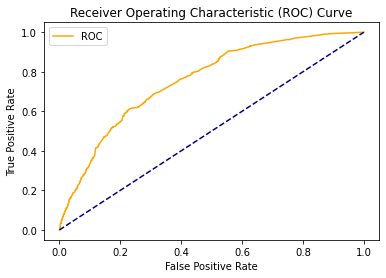

In [36]:
plot_roc_curve(fpr,tpr)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      3689
           1       0.42      0.51      0.46       916

    accuracy                           0.76      4605
   macro avg       0.65      0.67      0.66      4605
weighted avg       0.78      0.76      0.77      4605



In [39]:
from sklearn import metrics

In [40]:
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.precision_score(y_test, y_pred_class))
print(metrics.recall_score(y_test, y_pred_class))
print(metrics.f1_score(y_test, y_pred_class))

0.7648208469055374
0.4237442922374429
0.5065502183406113
0.4614619592242665


In [41]:
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.precision_score(y_test, y_pred_class,pos_label=0))
print(metrics.recall_score(y_test, y_pred_class,pos_label=0))
print(metrics.f1_score(y_test,y_pred_class, pos_label=0))

0.7648208469055374
0.8712250712250712
0.8289509352127948
0.8495624392276704


In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
scores = cross_val_score(rf_model,X,y,cv=5)
scores

array([0.78403909, 0.81335505, 0.75635179, 0.7829912 , 0.80254154])

In [44]:
recall = cross_val_score(rf_model,X,y,cv=5,scoring='recall')
recall

array([0.24386252, 0.1309329 , 0.23895254, 0.26557377, 0.22786885])

In [45]:
f1_macro = cross_val_score(rf_model,X,y,cv=5,scoring='f1_macro')
f1_macro

array([0.59378721, 0.55504696, 0.5718767 , 0.59747285, 0.6002362 ])

In [46]:
precision = cross_val_score(rf_model,X,y,cv=5,scoring='precision')
precision

array([0.41666667, 0.6637931 , 0.34411085, 0.41952507, 0.50352113])

In [47]:
weighted_val_new.shape

(15478, 3)

In [48]:
weighted_val_new.describe()

,Weighted_Value,IsHS
count,15478.000000,15478.000000
mean,0.411962,0.197248
std,0.490186,0.397934
min,0.000000,0.000000
25%,0.111111,0.000000
50%,0.261803,0.000000
75%,0.572491,0.000000
max,9.228528,1.000000


In [49]:
from sklearn.metrics import precision_recall_fscore_support as score

In [50]:
y_pred = rf_model.predict(X_test)

# print the first predicted probabilities of class membership
y_pred_class =(rf_model.predict_proba(X_test)[:,1] >=0.3).astype(bool)


precision, recall,fscore,support = score(y_test,y_pred_class,pos_label=1,average='binary')

print('Precision : {} / Recall : {}  / F1 Score : {}'.format(round(precision,3),round(recall,3),round(fscore,3)))

Precision : 0.423 / Recall : 0.507  / F1 Score : 0.461


In [51]:
model_Name = 'final_sentence_lex_test.pkl'
joblib.dump(model,model_Name)

['final_sentence_lex_test.pkl']

In [52]:
# load the model from disk

loaded_model = joblib.load(model_Name)
result = loaded_model.score(X_test,y_test)
print(result)

0.792399565689468


In [53]:
#make a prediction
X_test_input =[[1.321],[0.212],[1.2321],[3.01231],[1.4526],[0.544]]

ynew =rf_model.predict(X_test_input)
ynew

array([0, 0, 0, 0, 1, 0])